
First countries to fall below the connectivity threshold:
Country Iceland (Metanode 159) - Iteration 106
Country United Kingdom (Metanode 89) - Iteration 107
Country Japan (Metanode 131) - Iteration 108
Country Faroe Islands (Metanode 175) - Iteration 108
Country Denmark (Metanode 61) - Iteration 108

Last countries to fall below the connectivity threshold:
Country Guadeloupe (Metanode 10) - Iteration 502
Country Grenada (Metanode 100) - Iteration 502
Country Saint Kitts and Nevis (Metanode 115) - Iteration 502
Country Trinidad (Metanode 128) - Iteration 502
Country Barbados (Metanode 135) - Iteration 502
Country Guyana (Metanode 168) - Iteration 502
Country Martinique (Metanode 180) - Iteration 502
Country Dominica (Metanode 28) - Iteration 502
Country St. Lucia (Metanode 30) - Iteration 502
Country Antigua (Metanode 40) - Iteration 502
Country St. Vincent (Metanode 62) - Iteration 502
Country Montserrat (Metanode 63) - Iteration 502
Country Anguilla (Metanode 72) - Iteration 502
Cou

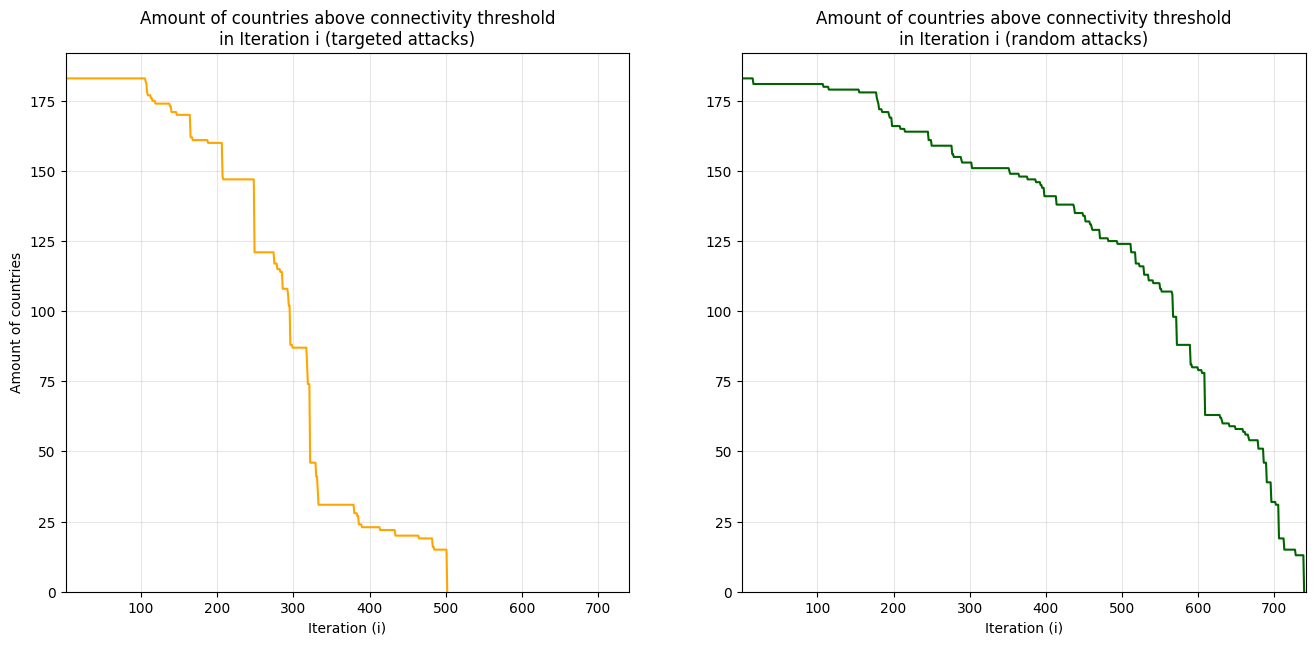

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipynbname#necessary to get filepath to jupyter notebook file

_FILE_DIR = ipynbname.path().parent#obtain directory of this file
_PROJ_DIR = _FILE_DIR.parent.parent#obtain main project directory
_DATA_DIR = _PROJ_DIR / "dataset"
_DATAEXTR_DIR = _PROJ_DIR / "dataExtracted"
_VIS_DIR = _PROJ_DIR / "visualizations"

G = nx.read_graphml(str(_DATAEXTR_DIR + "/THE_MERGED_GRAPH.graphml"))

def reverse_metanodes(G, meta_key='meta'):
    return {d['country'] : n for n, d in G.nodes(data=True) if d.get(meta_key, False)}

def printResults(mode):

    # load data
    # --------------
    df_targeted = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_targeted.csv"))
    df_rel_targeted = (df_targeted / df_targeted.iloc[0]).copy()
    
    df_random = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_random.csv"))
    df_rel_random = (df_random / df_random.iloc[0]).copy()
    # --------------

    # plot amount of countries still above threshold
    # --------------
    countries_count_targeted = []
    countries_count_random = []
    
    if mode == 'connectivity':

        for row in df_rel_targeted.iterrows():
            countries_count_targeted.append(sum(np.where(row[1] >= 0.5, 1, 0)))

        for row in df_rel_random.iterrows():
            countries_count_random.append(sum(np.where(row[1] >= 0.5, 1, 0)))
    
    elif mode == 'ping':

        for i in range(len(df_targeted)):

            tot_t = 0
            vals_abs = df_targeted.iloc[i].values
            vals_rel = df_rel_targeted.iloc[i].values

            for j in range(len(vals_abs)):
                if vals_abs[j] <= 450 and vals_rel[j] <= 2:
                    tot_t += 1

            countries_count_targeted.append(tot_t)
        
        for i in range(len(df_random)):

            tot_r = 0
            vals_abs = df_random.iloc[i].values
            vals_rel = df_rel_random.iloc[i].values

            for j in range(len(vals_abs)):
                if vals_abs[j] <= 450 and vals_rel[j] <= 2:
                    tot_r += 1

            countries_count_random.append(tot_r)


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(16)

    ax1.plot(range(1, len(df_targeted)+1), countries_count_targeted, c= 'orange')
    ax2.plot(range(1, len(df_random)+1), countries_count_random, c= 'darkgreen')

    ax1.grid(alpha= 0.3)
    ax2.grid(alpha= 0.3)

    word = "above" if mode == 'connectivity' else "below"
    ax1.set_title(f"Amount of countries {word} {mode} threshold\nin Iteration i (targeted attacks)")
    ax2.set_title(f"Amount of countries {word} {mode} threshold\nin Iteration i (random attacks)")
    
    ax1.set_xlabel("Iteration (i)")
    ax2.set_xlabel("Iteration (i)")

    ax1.set_ylabel("Amount of countries")

    ax1.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))
    ax2.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))

    ax1.set_ylim(bottom= 0)
    ax2.set_ylim(bottom= 0)

    # --------------

    # metanode - country name dictionary + log files
    # --------------
    meta_dict = reverse_metanodes(G)

    dropout_file = _DATAEXTR_DIR + f"/dropouts_{mode}_targeted.txt"
    edges_file = _DATAEXTR_DIR + f"/iterations_{mode}_targeted.txt"

    last_iter = len(df_targeted)


    # first and last dropouts information
    # --------------
    first_dropouts = {}
    last_dropouts = []
    x = 5
    with open(dropout_file) as f:
        for i, l in enumerate(f):
            itr, info = l.split(": Country ")

            _, nb = itr.split()
            nb = int(nb)

            node = info.split(" dropped out")[0]

            if i < x:
                first_dropouts[node] = nb
            
            elif nb == last_iter:
                last_dropouts.append(node)
    
    print(f"\nFirst countries to fall below the {mode} threshold:")
    for k, v in first_dropouts.items():
        print(f"Country {k} ({meta_dict[k]}) - Iteration {v}")

    print(f"\nLast countries to fall below the {mode} threshold:")
    for c in last_dropouts:
        print(f"Country {c} ({meta_dict[c]}) - Iteration {last_iter}")

    # first and last edges removed information
    # --------------
    first_edges = []
    last_edges = []
    y = 5
    with open(edges_file) as f:
        for i, l in enumerate(f):
            if i < y:
                itr, info = l.split(": ")
                info = info.strip("\n").strip("randomly").strip("removing").strip()
                first_edges.append(info)
            elif i >= (last_iter-y):
                itr, info = l.split(": ")
                info = info.strip("\n").strip("randomly").strip("removing").strip()
                last_edges.append(info)

    print(f"\nFirst removed edges:")
    for e in first_edges:
        print(e)
    
    print(f"\nLast removed edges:")
    for e in last_edges:
        print(e)
    # --------------






printResults("connectivity")


First countries to fall below the ping threshold:
Country Equatorial Guinea (Metanode 57) - Iteration 1
Country Sierra Leone (Metanode 149) - Iteration 7
Country Guinea Bissau (Metanode 160) - Iteration 7
Country Niue (Metanode 118) - Iteration 17
Country Wallis and Futuna (Metanode 12) - Iteration 17

Last countries to fall below the ping threshold:
Country Nigeria (Metanode 16) - Iteration 75

First removed edges:
removing edge USA <-> Hawaii (key=6)
removing edge USA <-> Hawaii (key=5)
removing edge USA <-> Hawaii (key=4)
removing edge USA <-> Hawaii (key=3)
removing edge USA <-> Hawaii (key=2)

Last removed edges:
removing edge 292 <-> 294 (key=0)
removing edge 238 <-> 280 (key=0)
removing edge 910 <-> Nigeria (key=0)
removing edge 1276 <-> Nigeria (key=0)
removing edge 1274 <-> Nigeria (key=0)


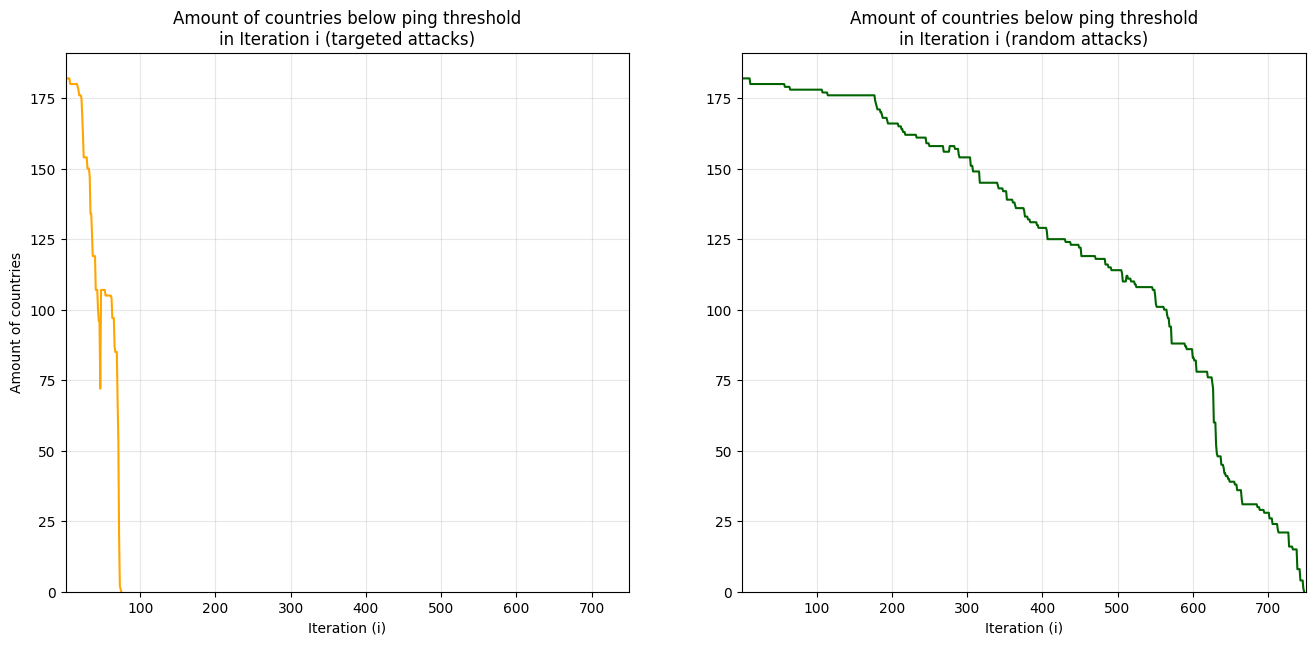

In [65]:
printResults("ping")